# Assignment Support Vector Machines

Approach
- 1. Load the data in pandas dataframe
- 2. Check for the categorical and numerical variables in data set
- 3. Encode the categorical variable
- 4. Feature Scaling of all the variables
- 5. Declare feature and target variables
- 6. Model training
- 7. Model Testing

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 'forest fires.txt',
 'forestfires (1).csv',
 'Problem_statement(salary_data) (1).txt',
 'SalaryData_Test(1).csv',
 'SalaryData_Train(1).csv',
 'Support vector Machine.ipynb']

In [38]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#load dataset

df_train = pd.read_csv('SalaryData_Train(1).csv')

df_test = pd.read_csv('SalaryData_Test(1).csv')

In [4]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# check for categorical variable

categorical = [var for var in df_train.columns if df_train[var].dtype=='object']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [6]:
# view categorical variable in dataframe

df_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [7]:
np.unique(df_train['Salary'])

array([' <=50K', ' >50K'], dtype=object)

In [8]:
np.unique(df_train['maritalstatus'])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

# Data preprocessing

### Stripping all the spaces of the columns using str.strip() function

In [9]:
np.unique(df_train.education)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [10]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [19]:
strip_columns = ['workclass', 'education','maritalstatus',
       'occupation', 'relationship', 'race', 'sex','native', 'Salary']

In [20]:
for i in strip_columns:
    df_train[i] = df_train[i].str.strip()

In [24]:
print(np.unique(df_train.education))
print(np.unique(df_train.workclass))


['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']


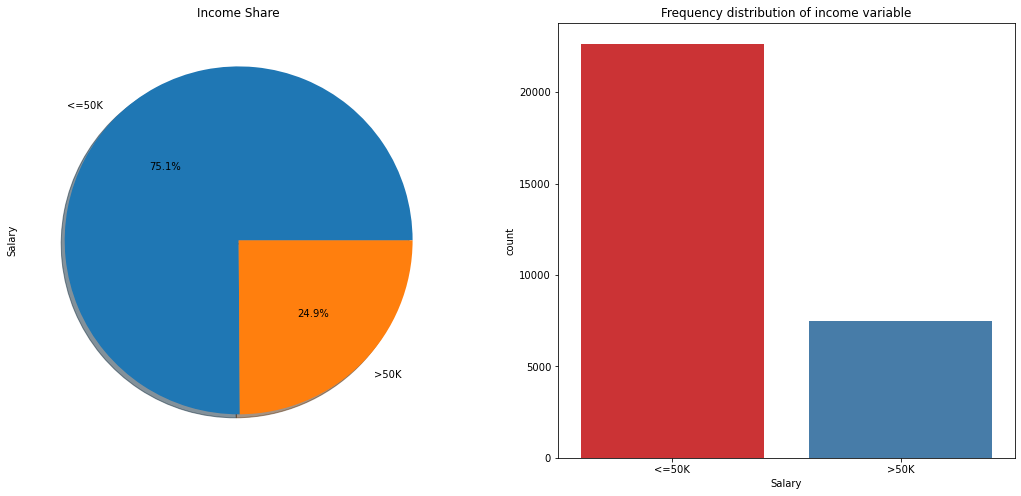

In [41]:
df =df_train
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['Salary'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Salary", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

In [43]:
df['Salary'].value_counts()/len(df)

<=50K    0.751069
>50K     0.248931
Name: Salary, dtype: float64

In [80]:
# Declare features and traget variables

X = df_train.drop(['Salary'], axis=1)
X_test = df_test.drop(['Salary'], axis=1)
Y = df_train['Salary']
Y_test = df_test['Salary']

In [45]:
# Encode the variables with one-hot encoding
from sklearn import preprocessing
#!pip install category_encoders
import category_encoders as ce


In [81]:
# encoding categorical variables

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X = encoder.fit_transform(X)
X_test = encoder.fit_transform(X_test)


In [88]:
X_test

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,25,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15056,39,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15057,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15058,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# feature scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [91]:
X_df = pd.DataFrame(X_scaled)
X_test_df = pd.DataFrame(X_test_scaled)
X_test_df.columns = X_test.columns


X_df.columns = X.columns
X_df

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.042779,4.752021,-0.300567,-1.682106,-0.179651,-0.271246,-0.192155,-0.02155,2.231497,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
1,0.880261,-0.210437,3.327045,-1.682106,-0.179651,-0.271246,-0.192155,-0.02155,2.231497,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
2,-0.033356,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,1.437060,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
3,1.108665,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
4,-0.794703,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,2.231497,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
30157,0.118914,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,1.437060,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
30158,1.489339,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,1.437060,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
30159,-1.251511,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,1.437060,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766


In [92]:

from sklearn.svm import SVC

classifier = SVC()

classifier.fit(X_df, Y)

score = classifier.score(X_test_df, Y_test)

In [93]:
print(score)


0.0


SVC()

In [97]:
X_df

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.042779,4.752021,-0.300567,-1.682106,-0.179651,-0.271246,-0.192155,-0.02155,2.231497,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
1,0.880261,-0.210437,3.327045,-1.682106,-0.179651,-0.271246,-0.192155,-0.02155,2.231497,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
2,-0.033356,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,1.437060,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
3,1.108665,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
4,-0.794703,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,2.231497,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,-0.695865,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
30157,0.118914,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,1.437060,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
30158,1.489339,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,1.437060,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
30159,-1.251511,-0.210437,-0.300567,0.594493,-0.179651,-0.271246,-0.192155,-0.02155,-0.448130,1.437060,...,-0.031554,-0.02155,-0.019101,-0.024437,-0.031023,-0.033096,-0.046114,-0.025107,-0.02822,-0.020766
